<a href="https://colab.research.google.com/github/kjamison/brainmontageplot/blob/main/brainmontageplot_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#may need to restart the runtime and run again after the first time this installs new packages
!pip install git+https://github.com/kjamison/brainmontageplot.git

import numpy as np
from brainmontage import create_montage_figure, save_image
from matplotlib import pyplot as plt



Dataset created in /usr/local/lib/python3.10/dist-packages/brainmontage/nilearn_data/fsaverage



Downloaded 26861568 of 34242788 bytes (78.4%,    0.6s remaining) ...done. (5 seconds, 0 min)
Extracting data from /usr/local/lib/python3.10/dist-packages/brainmontage/nilearn_data/fsaverage/735bf0f211246c83396b5f21f706c224/download..... done.


CPU times: user 2.61 s, sys: 713 ms, total: 3.32 s
Wall time: 8.79 s


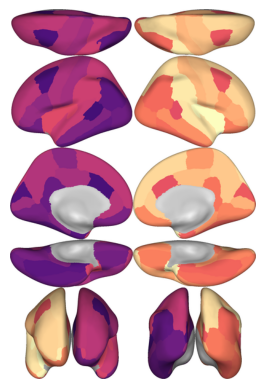

In [3]:
%%time

roivals=np.arange(86)+1 #example values for each ROI (1-numroi)

img=create_montage_figure(roivals,atlasname='fs86', 
    viewnames='all',surftype='infl',clim=[0,86],colormap='magma')

save_image(img,'mydata_montage.png')
#or you can add outputimagefile='mydata_montage.png' to create_montage_figure() to save directly

plt.figure()
plt.imshow(img)
_=plt.axis('off')


Saved mydata_montage_withslices_and_colorbar.png
CPU times: user 4.58 s, sys: 494 ms, total: 5.07 s
Wall time: 4.77 s


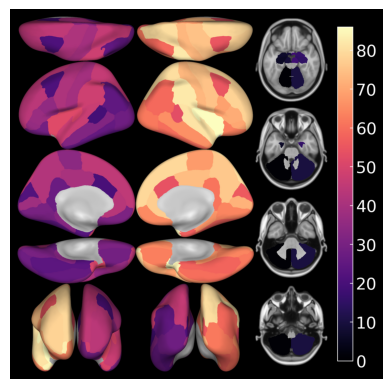

In [8]:
%%time
#create an image with surface views, upscaled to higher dpi (1 instead of 0.25), 
# a vertical row of axial slices, with black background
img_with_slices=create_montage_figure(roivals,atlasname='fs86',
    viewnames='all',surftype='infl',clim=[0,86],colormap='magma',
    slice_dict={'axial':[23,33,43,53]},mosaic_dict={'axial':[-1,1]},
    upscale_factor=2, backgroundcolor="black",face_mode='best',
    add_colorbar=True, colorbar_color='white', colorbar_fontsize=20,
    outputimagefile='mydata_montage_withslices_and_colorbar.png')

plt.figure()
plt.imshow(img_with_slices,cmap='magma',vmin=0,vmax=86)
_=plt.axis('off')


Saved mydata_montage_onlyslices.png
CPU times: user 3.64 s, sys: 315 ms, total: 3.96 s
Wall time: 4.62 s


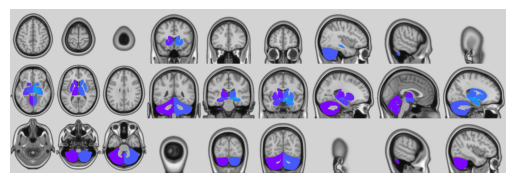

In [5]:
%%time
#Or an image with axial, coronal, and sagittal slices only, and a light gray background
img_slices=create_montage_figure(roivals,atlasname='fs86',
    viewnames='none',clim=[0,86],colormap='rainbow',
    slice_dict={'axial':range(0,180,20),'coronal':range(20,200,20),'sagittal':range(10,180,20)},
    backgroundcolor="lightgray",
    outputimagefile='mydata_montage_onlyslices.png')

plt.figure()
plt.imshow(img_slices)
_=plt.axis('off')


For cmapfile=lut, override input values and clim to display LUT colormap: /usr/local/lib/python3.10/dist-packages/brainmontage/atlases/fs86_LUT.txt.
For cmapfile=lut, override input values and clim to display LUT colormap: /usr/local/lib/python3.10/dist-packages/brainmontage/atlases/fs86_LUT.txt.
For cmapfile=lut, override input values and clim to display LUT colormap: /usr/local/lib/python3.10/dist-packages/brainmontage/atlases/shen268_LUT.txt.
For cmapfile=lut, override input values and clim to display LUT colormap: /usr/local/lib/python3.10/dist-packages/brainmontage/atlases/schaefer100_7Networks_LUT.txt.
For cmapfile=lut, override input values and clim to display LUT colormap: /usr/local/lib/python3.10/dist-packages/brainmontage/atlases/schaefer200_7Networks_LUT.txt.
For cmapfile=lut, override input values and clim to display LUT colormap: /usr/local/lib/python3.10/dist-packages/brainmontage/atlases/schaefer300_7Networks_LUT.txt.
For cmapfile=lut, override input values and clim to 

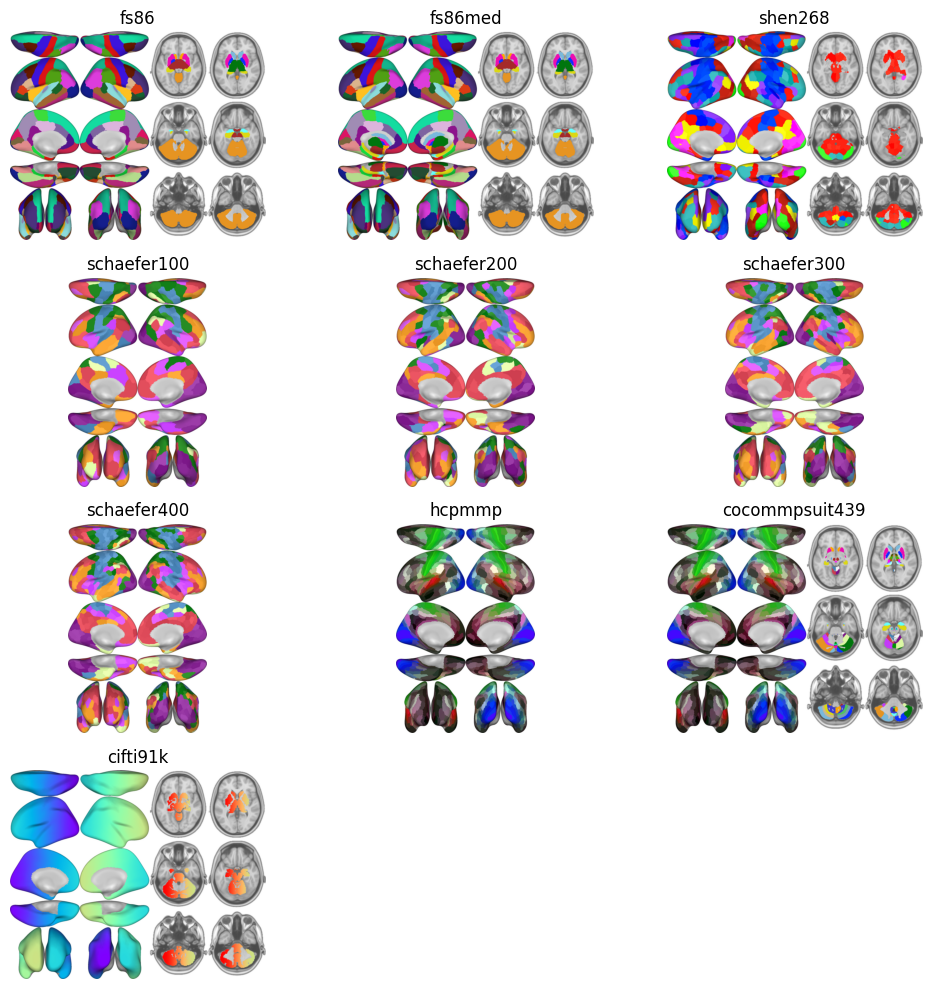

In [6]:
%%time
#loop through and display all available atlases, using colors from their LUT

from brainmontage import retrieve_atlas_info

atlaslist=retrieve_atlas_info('list')

fig=plt.figure(figsize=(10,10))
for i,a in enumerate(atlaslist):
  atlasinfo=retrieve_atlas_info(a)
  if atlasinfo['subcorticalvolume']:
    sliceparams={'slice_dict':{'axial':[23,33,43,53,63,73]},'mosaic_dict':{'axial':[-1,2]},'slice_background_alpha':.75}
  else:
    sliceparams={}
  img=create_montage_figure(roivals=None,atlasname=a,colormap='lut',**sliceparams)
  ax=plt.subplot(int(np.ceil(np.sqrt(len(atlaslist)))),int(np.floor(np.sqrt(len(atlaslist)))),i+1)
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(a)

fig.tight_layout()